In [41]:
import pandas as pd
from sklearn.manifold import TSNE
from yellowbrick.text import TSNEVisualizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import spacy
%matplotlib inline


# 2. Data Visualisation and Exploration

To visualise the meaning of a word and its corresponding polarity, we vectorize the documents by conducting Word2Vec. In Word2Vec each token has its own vector independently of the context, compared to BERT embeddings. \
https://medium.com/swlh/differences-between-word2vec-and-bert-c08a3326b5d1

In [42]:
user_reviews = pd.read_csv("data/amazon.csv")
with open("StopWords.txt", "r") as f:
    stopwords = f.read().splitlines() 

RANDOM_STATE = 1

nlp = spacy.load("en_core_web_sm")

def tokenize(text: str, remove_punct=False):
    doc = nlp(text)
    tokens = [token.text for token in doc] if not remove_punct else [token.text for token in doc if not token.is_punct]
    return tokens

def remove_stopwords(tokens:list, stopword_list:list):
    tokens = set(tokens)
    stopwords = set(stopword_list)
    tokens.difference_update(stopwords)
    return list(tokens)

user_reviews["cleanedText"] = user_reviews.reviewText.str.lower().apply(tokenize, remove_punct=True).apply(remove_stopwords, stopword_list=stopwords).apply(lambda x: " ".join(x))


In [60]:
model = word2vec.Word2Vec(user_reviews["cleanedText"])

def tsne_plot(model):
    # source: https://www.kaggle.com/code/jeffd23/visualizing-word-vectors-with-t-sne
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv.get_vector(word))
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
tsne_plot(model)

AttributeError: 'list' object has no attribute 'shape'

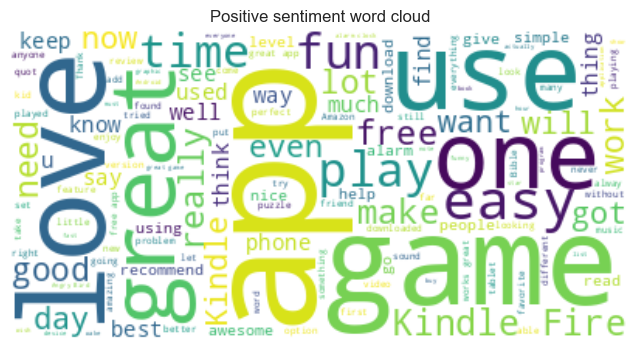

In [34]:
wordcloud = WordCloud(background_color="white")
positive_reviews_str = user_reviews.loc[user_reviews["Positive"] == 1,"reviewText"].str.cat(sep=" ")
negative_reviews_str = user_reviews.loc[user_reviews["Positive"] == 0,"reviewText"].str.cat(sep=" ")

wordcloud_positive = wordcloud.generate(positive_reviews_str)
plt.figure()
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Positive sentiment word cloud")

plt.show()

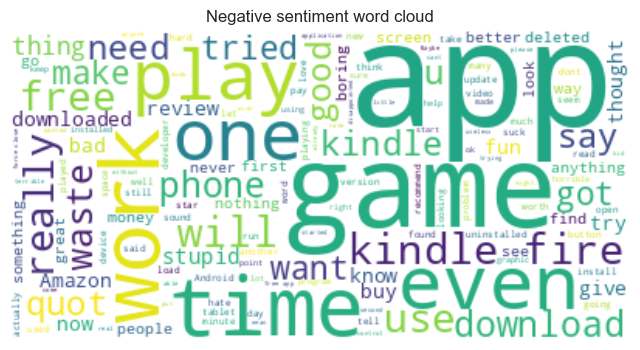

In [33]:
wordcloud_negative = wordcloud.generate(negative_reviews_str)
plt.figure()
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Negative sentiment word cloud")
plt.show()